estimation
hypothesis testing
modeling and prediction

In [ ]:
estimation:
    point estimation:
    interval estimation:
        

In [ ]:
machine produce articles of which 20% are defective. in random sample of 100 articles, 30 are defective. 
is there an evidence of deterioration of quality


10 oil tins are taken at random. from an automatic filling machine. the mean weight of tin is 15.8 kg and std is 0.5 kg.
does the sample mean differes significanatly from the intended weight of 16 kg.

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [12]:
np.random.seed(10)

In [16]:
population_ages1=stats.poisson.rvs(loc=18,mu=35,size=150000)
population_ages2=stats.poisson.rvs(loc=18,mu=10,size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))
print(population_ages)

[63 64 57 ... 27 35 28]


In [18]:
population_ages.mean()

42.984512

In [25]:
np.random.seed(6)
sample_ages=np.random.choice(a=population_ages,size=500)
print(sample_ages.mean())
print(population_ages.mean()-sample_ages.mean())

42.506
0.47851200000000205


In [26]:
random.seed(10)
population_races=(["white"]*100000)+(["black"]*50000)+(["hispanic"]*50000)+(["asian"]*25000)+(["other"]*25000)

In [40]:
print(len(population_races))

demo_sample=random.sample(population_races,10000)

for race in set(population_races):
    print(race+" proportion estimate:")
    print(demo_sample.count(race)/1000)

250000
hispanic proportion estimate:
1.951
black proportion estimate:
1.971
white proportion estimate:
4.12
other proportion estimate:
0.968
asian proportion estimate:
0.99


-0.11894482839176335


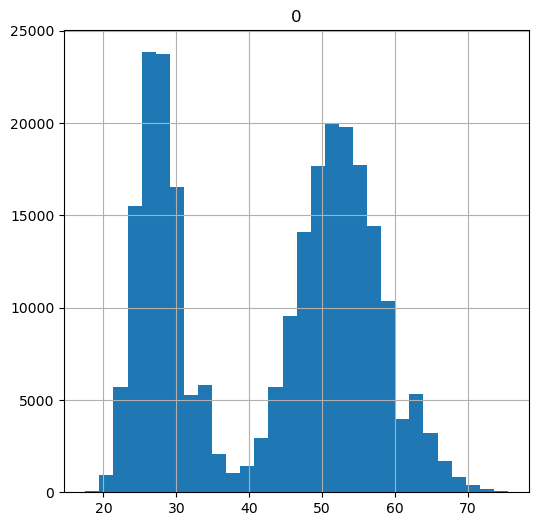

In [45]:
pd.DataFrame(population_ages).hist(bins=30,range=(17.5,75.5),figsize=(6,6))
print(stats.skew(population_ages));

-0.05257736292360262


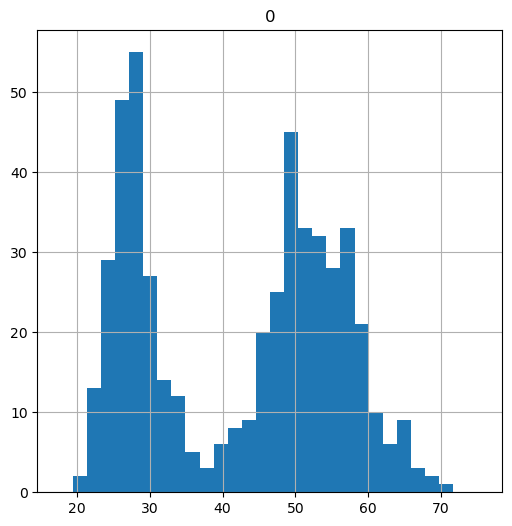

In [52]:
pd.DataFrame(sample_ages).hist(bins=30,range=(17.5,75.5),figsize=(6,6))
print(stats.skew(sample_ages));

In [58]:
np.random.seed(10)
point_estimates=[]

for x in range(200):
    sample = np.random.choice(a=population_ages,size=500)
    point_estimates.append(sample.mean())
    
print(point_estimates)

[42.4, 42.626, 42.32, 43.444, 43.47, 41.864, 42.236, 42.8, 43.334, 43.042, 43.07, 43.55, 43.294, 42.924, 43.594, 41.966, 42.72, 43.294, 42.738, 41.64, 43.38, 43.484, 42.568, 42.352, 42.07, 44.144, 42.726, 42.178, 42.15, 42.974, 43.11, 43.28, 43.104, 41.98, 42.11, 43.058, 42.734, 43.73, 42.638, 42.474, 43.596, 43.58, 42.748, 43.064, 42.276, 43.688, 42.58, 43.348, 43.182, 43.386, 43.026, 42.664, 42.942, 43.178, 43.508, 43.566, 43.114, 42.692, 42.708, 43.366, 44.71, 43.874, 42.972, 42.836, 42.556, 42.928, 43.504, 42.472, 43.672, 43.108, 42.832, 42.226, 43.172, 43.156, 42.48, 42.926, 44.664, 43.204, 42.49, 44.002, 42.738, 42.556, 43.168, 42.246, 44.27, 42.274, 43.58, 43.012, 43.744, 42.604, 42.678, 44.126, 44.168, 41.05, 43.148, 44.588, 42.888, 44.246, 41.87, 44.794, 43.978, 42.688, 43.456, 44.296, 44.144, 42.648, 43.142, 42.582, 42.408, 43.568, 42.27, 42.748, 43.014, 43.076, 43.094, 42.912, 42.578, 43.506, 43.804, 42.934, 43.666, 43.3, 42.832, 43.114, 42.666, 42.374, 42.944, 43.312, 42.35

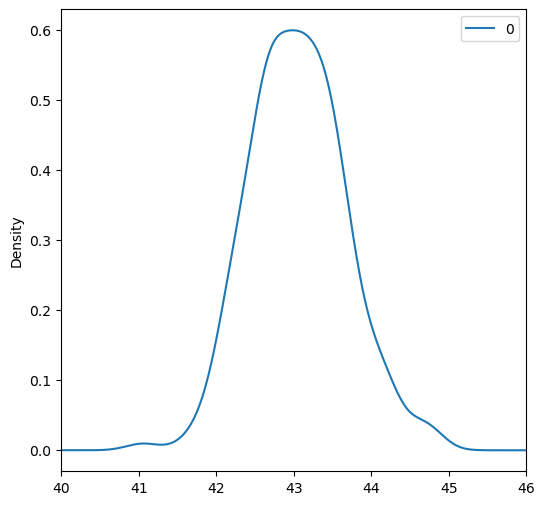

In [62]:
pd.DataFrame(point_estimates).plot(kind="density",figsize=(6,6),xlim=(40,46));

In [66]:
population_ages.mean()-np.array(point_estimates).mean()

-0.06666799999999284

In [74]:
np.random.seed(10)
sample_size=1000
sample=np.random.choice(a=population_ages,size=sample_size)
sample_mean=sample.mean()
print('sample_mean',sample_mean)

z_critical = stats.norm.ppf(q=0.975)
print('z-critical value',z_critical)
print()

print('population_mean:',population_ages.mean())

pop_stdev=population_ages.std()
margin_of_error = z_critical*(pop_stdev/math.sqrt(sample_size))
confidence_interval = sample_mean-margin_of_error,sample_mean+margin_of_error

print('confidence interval:',confidence_interval)
print()

sample_mean 42.513
z-critical value 1.959963984540054

population_mean: 42.984512
confidence interval: (41.693384848764644, 43.33261515123535)



In [80]:
np.random.seed(10)
sample_size=10000
sample=np.random.choice(a=population_ages,size=sample_size)
sample_mean=sample.mean()
print('sample_mean',sample_mean)

z_critical = stats.norm.cdf(x=0.975)
print('z-critical value',z_critical)
print()

print('population_mean:',population_ages.mean())

pop_stdev=population_ages.std()
margin_of_error = z_critical*(pop_stdev/math.sqrt(sample_size))
confidence_interval = sample_mean-margin_of_error,sample_mean+margin_of_error

print('confidence interval:',confidence_interval)
print()

sample_mean 42.8163
z-critical value 0.8352198700196897

population_mean: 42.984512
confidence interval: (42.70585076688246, 42.92674923311753)



In [107]:
np.random.seed(12)
sample_size=1000

CI_intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a=population_ages,size=sample_size)
    sample_mean=round(sample.mean(),2)
    sample_means.append(sample_mean)
    
z_critical = stats.norm.cdf(x=0.975)
print('z-critical value',z_critical)
print()

print('population_mean:',population_ages.mean())
print()

pop_stdev=population_ages.std()
# stats.norm.ppf(q=0.025)

margin_of_error = z_critical*(pop_stdev/math.sqrt(sample_size))

confidence_interval = round(sample_mean-margin_of_error,2),round(sample_mean+margin_of_error,2)

CI_intervals.append(confidence_interval)
print(CI_intervals,sample_means)


z-critical value 0.8352198700196897

population_mean: 42.984512

[(43.12, 43.82)] [42.84, 42.93, 43.79, 42.78, 42.38, 43.37, 42.88, 42.65, 42.13, 43.18, 43.56, 43.0, 42.87, 43.12, 43.18, 43.1, 42.65, 43.01, 43.03, 43.4, 42.23, 42.89, 44.1, 42.45, 43.47]


In [117]:
CI_mean_intervals = pd.DataFrame(CI_intervals,sample_means)
print(CI_mean_intervals)

           0      1
42.84  43.12  43.82
42.93  43.12  43.82
43.79  43.12  43.82
42.78  43.12  43.82
42.38  43.12  43.82
43.37  43.12  43.82
42.88  43.12  43.82
42.65  43.12  43.82
42.13  43.12  43.82
43.18  43.12  43.82
43.56  43.12  43.82
43.00  43.12  43.82
42.87  43.12  43.82
43.12  43.12  43.82
43.18  43.12  43.82
43.10  43.12  43.82
42.65  43.12  43.82
43.01  43.12  43.82
43.03  43.12  43.82
43.40  43.12  43.82
42.23  43.12  43.82
42.89  43.12  43.82
44.10  43.12  43.82
42.45  43.12  43.82
43.47  43.12  43.82


In [118]:
sample_mean_CI = pd.DataFrame({'CI_intervals':CI_intervals,'sample_mean':sample_means})

ValueError: All arrays must be of the same length

In [115]:
sample_mean_CI = pd.DataFrame({'CI_intervals':CI_intervals,'Sample_mean' :sample_means})

ValueError: All arrays must be of the same length

In [104]:
print(CI_mean_intervals)

           0      1
42.84  43.12  43.82
42.93  43.12  43.82
43.79  43.12  43.82
42.78  43.12  43.82
42.38  43.12  43.82
43.37  43.12  43.82
42.88  43.12  43.82
42.65  43.12  43.82
42.13  43.12  43.82
43.18  43.12  43.82
43.56  43.12  43.82
43.00  43.12  43.82
42.87  43.12  43.82
43.12  43.12  43.82
43.18  43.12  43.82
43.10  43.12  43.82
42.65  43.12  43.82
43.01  43.12  43.82
43.03  43.12  43.82
43.40  43.12  43.82
42.23  43.12  43.82
42.89  43.12  43.82
44.10  43.12  43.82
42.45  43.12  43.82
43.47  43.12  43.82


In [125]:
np.random.seed(10)


In [133]:

sample_size = 25
sample = np.random.choice( a= population_ages, size = sample_size)
sample_mean = sample.mean()
print(sample_mean)   

t_critical = stats.t.ppf(q = 0.975, df=24) # Get the t-critical value*

print("t-critical value:",t_critical) 
print()

# Check the t-critical value

sample_stdev = sample.std(ddof=1) # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size) # standard deviation estimate 
margin_of_error = t_critical * sigma
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("Confidence interval:", confidence_interval)
print()

37.0
t-critical value: 2.0638985616280205

Confidence interval: (31.9811463852946, 42.0188536147054)

